---
CSC 268 Lab 5:  Pixel Replacement
---

This lab will look at some simple applications of pixel replacement.  We begin with our usual set of imports and definitions.  We'll also load three images.

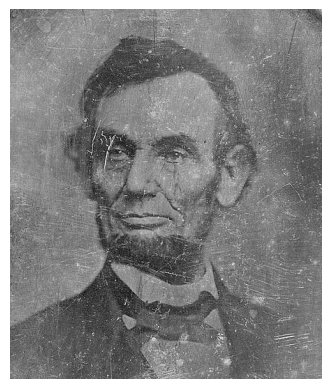

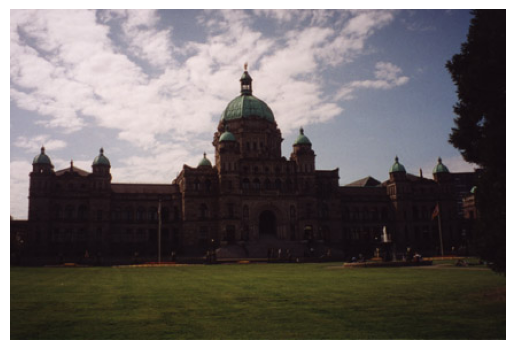

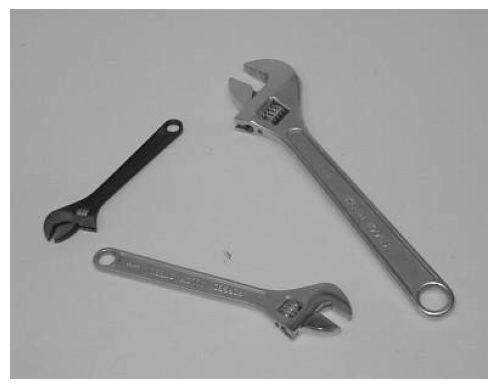

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def imhist(img,title=''):
    hist = cv.calcHist([img],[0],None,[256],[0.0,1.0])
    plt.bar(range(0,256),hist.ravel())
    plt.xlim([0,256])
    plt.title(title)
    plt.show()
    
lincoln = cv.imread('lincoln.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
dome = cv.imread('dome.jpg',cv.IMREAD_COLOR)[:,:,[2,1,0]].astype(np.float32)/255.0
wrenches = cv.imread('wrenches.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
imshow(lincoln)
imshow(dome)
imshow(wrenches)

Let's look at the histogram profiles of these images.  The Lincoln photograph has low contrast:  most of the pixel intensities are in the middle third of the range.  The building suffers from poor exposure:  some areas are bright, and some dark, with little in the middle.  (Note that we are combining all three color planes into a single histogram for simplicity.)  The wrench image is a different case entirely.  At first glance the histogram looks similar to Lincoln's, with a large peak in the middle.  However, that peak is caused by the mostly uniform gray background.  Unlike Lincoln, there aren't really any details here that need to be enhanced.

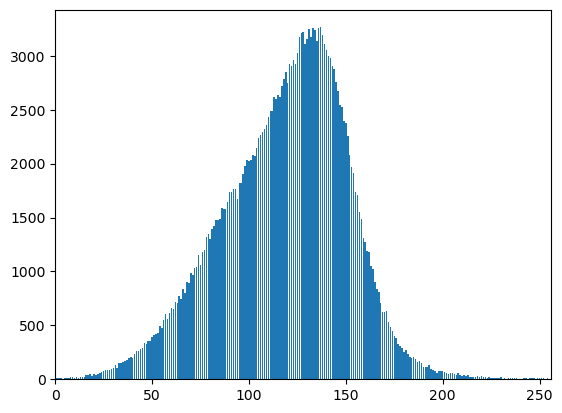

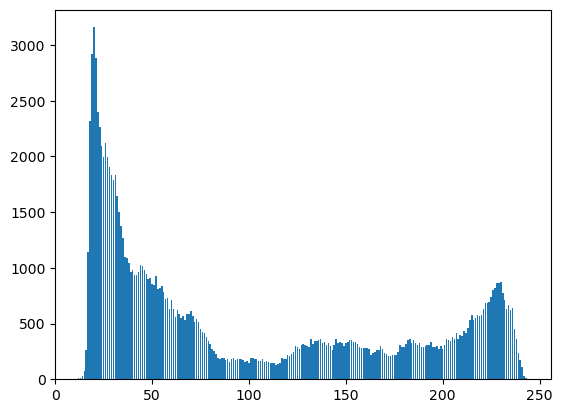

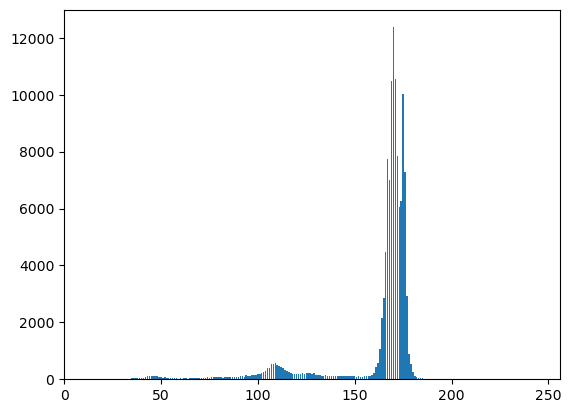

In [7]:
imhist(lincoln)
imhist(dome)
imhist(wrenches)

While we're at it, we can also plot the level curves for these images.  There's no new information here; we're just displaying it in a slightly different way.

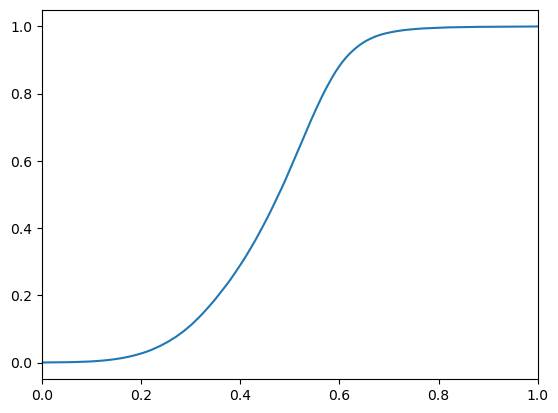

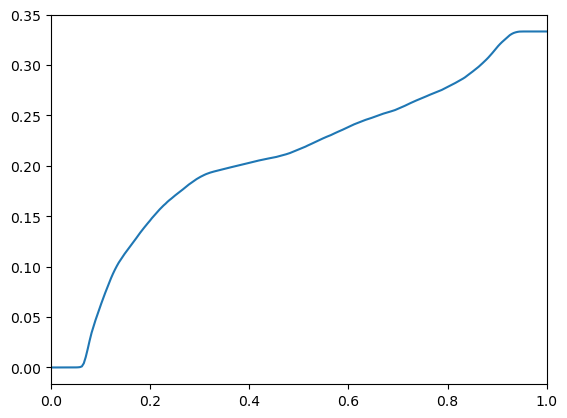

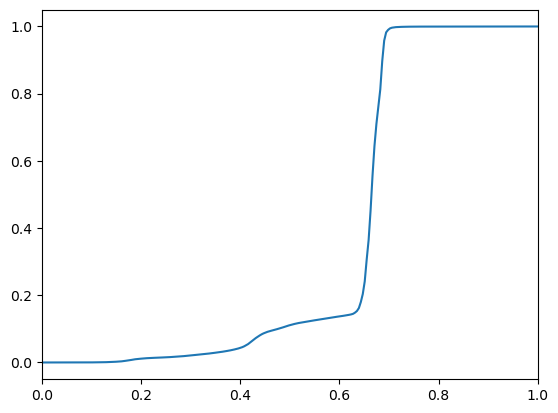

In [9]:
def imlevel(img,title=''):
    hist = cv.calcHist([img],[0],None,[256],[0.0,1.0])
    lvl = np.cumsum(hist)/img.size
    plt.plot(np.linspace(0,1,256),lvl.ravel())
    plt.xlim([0,1])
    plt.title(title)
    plt.show()
    
imlevel(lincoln)
imlevel(dome)
imlevel(wrenches)

OpenCV has a function called `equalizeHist` that performs histogram equalization.  Let's try it on Lincoln and see how it works.  Unfortunately it is only defined for the unsigned 8-bit arrays, so we'll load the file again in that format.  The result has better contrast.  We can plot a histogram and level curve for the new image and see what has changed.

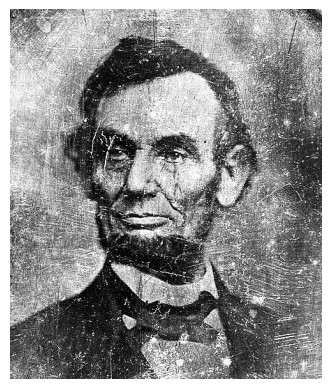

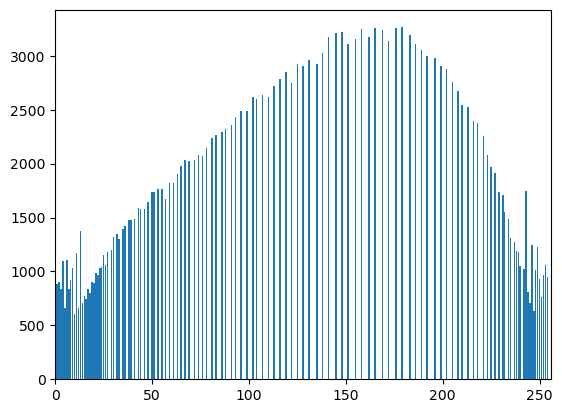

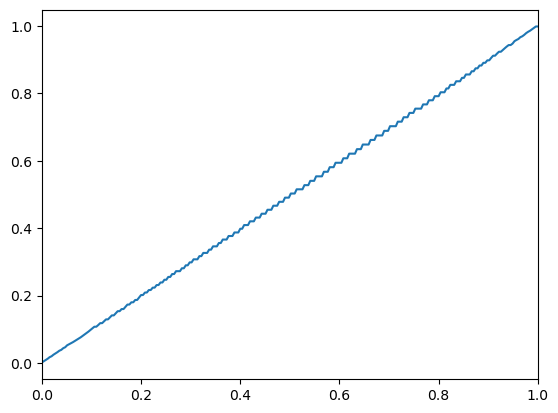

In [13]:
lincoln8 = cv.imread('lincoln.jpg',cv.IMREAD_GRAYSCALE)
lincoln_eq = cv.equalizeHist(lincoln8)
imshow(lincoln_eq)
imhist(lincoln_eq.astype(np.float32)/255)
imlevel(lincoln_eq.astype(np.float32)/255)

The histogram still has the same profile, but we can see that it has been stretched out to fill much more of the intensity range.  The level curve has been straightened out almost to a perfect diagonal, albeit with some tiny stairsteps visible.

Try the same thing now with the wrench image.  Why does the result look bad?  Discuss with your lab partners.  What might be an appropriate treatment of this image?  What considerations should guide you in making this determination?

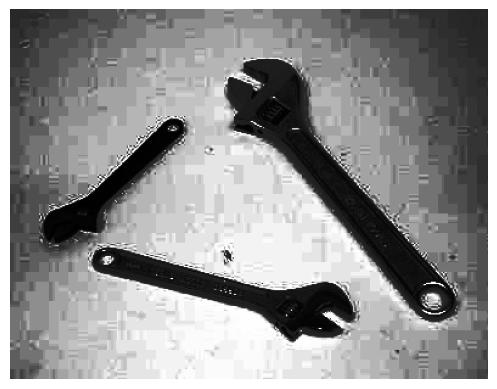

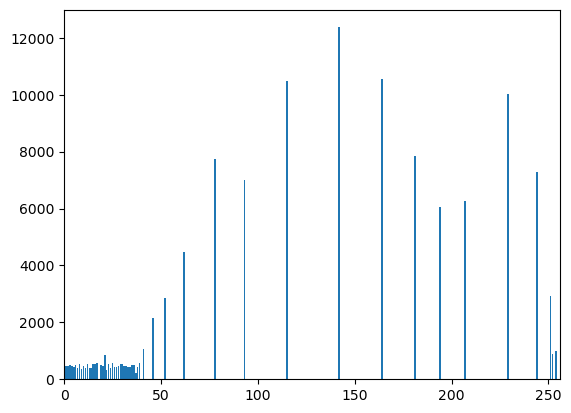

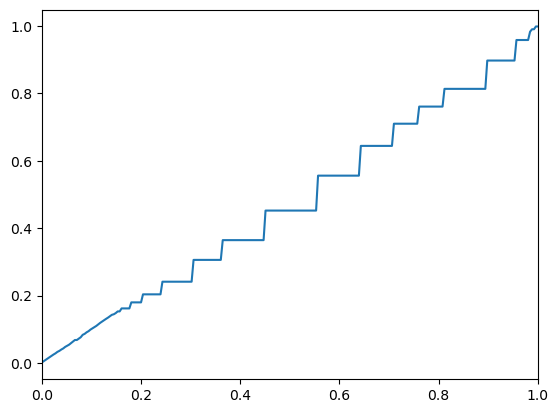

In [16]:
# TODO:  Create and display a histogram-equalized version of the wrench image, 
# as well as its histogram and level curve.

wrench8 = cv.imread('wrenches.jpg',cv.IMREAD_GRAYSCALE)
wrench_eq = cv.equalizeHist(wrench8)
imshow(wrench_eq)
imhist(wrench_eq.astype(np.float32)/255)
imlevel(wrench_eq.astype(np.float32)/255)

Histogram equalization is a little trickier for color images.  For many operations, we can treat the three color planes independently and put them back together again for the final result.  However, if different colors are scaled differently during equalization then this may alter the balance and change the overall hue.

What we really want to do is equalize the brightness while leaving the color alone.  This calls for use of a color space that separates intensity along a single axis (with the other two left holding the chromaticity).  We have seen several candidates:  CIE LAB, CIE LUV, and HSV for example.  Pick one of these and convert to it.  Select the plane containing the grayscale intensity, perform histogram equalization on it, and replace the original layer with the equalized version.  Then convert back to RGB space and display.

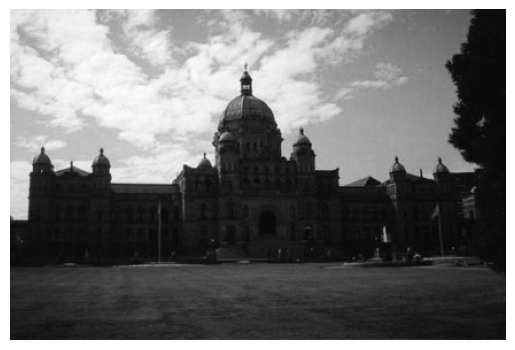

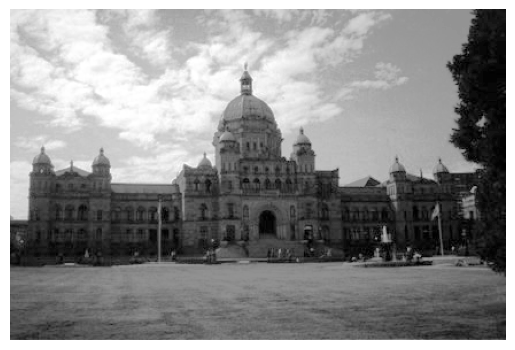

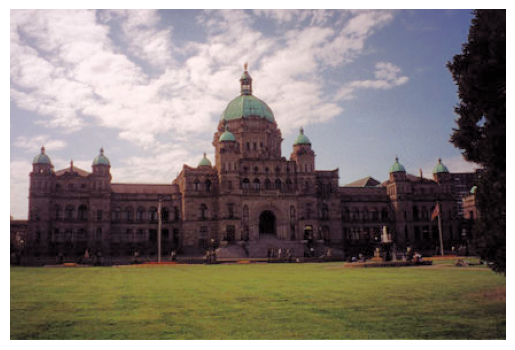

In [25]:
# TODO: Perform histogram equalization only on the intensity component of the dome image

dome8bgr = cv.imread('dome.jpg',cv.IMREAD_COLOR)
dome_hsv = cv.cvtColor(dome8bgr, cv.COLOR_BGR2HSV)
imshow(dome_hsv[:,:,2])
dome_hsv[:,:,2] = cv.equalizeHist(dome_hsv[:,:,2])
imshow(dome_hsv[:,:,2])
dome_eq = cv.cvtColor(dome_hsv, cv.COLOR_HSV2BGR)[:,:,[2,1,0]]
imshow(dome_eq)

The `equalizeHist` function is a useful shortcut, although it is inconvenient that it only works for unsigned 8-bit integers.  Implementing such a function for yourself isn't all that difficult, especially because we have already computed the level curve.  If you have time at the end of the lab, try writing your own implementation of `equalizeHist` that will work on floating point values.  To check your work, try it on `lincoln` and see if it looks like the result you got before.  (Note: using NumPy indexing, it is possible to write this function in just three lines of code, as you can see in the solution provided.  Try to do it yourself though!)

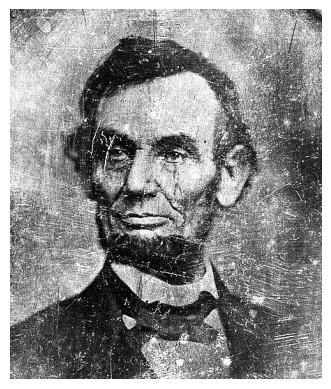

In [26]:
# TODO:  Write your own version of equalizeHist that works on float values.

def equalizeHist(img):
    hist = cv.calcHist([img],[0],None,[256],[0.0,1.0])
    lvl = np.cumsum(hist)/img.size
    return(lvl[(255*img).astype(np.uint8)])

imshow(equalizeHist(lincoln))